# DATA FOR BETTER HEALTH | First Hackathon 

Initiative:
https://dataforbetterhealth.be/fr/

Resources:
https://github.com/Sciensano-Healthdata/dataforbetterhealth


"Data for Better Health" aims at finding incentive mechanisms for a fair data policy in the Belgium public health sector. An integrated data access policy will lead to: better support for scientific research, a more effective development of medicines and medical devices, improved patient care, improved support for clinical trials, support for personalized care, support for prevention, patient-centered care, identification of current impediments and lower medical expenses. This hackathon took place during the 25th and 26th of February, 2019. It is the first of series of hackathons, it's main objective was to familiarize the participants with the resources. 

This exercise was done in collaboration with Vuong Bui.

## Explorying the dataframes

In [ ]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

Secret dataset: Relevant (anonymized) data with the amount of reimbursement provided by insurance companies for drugs purchase.  

In [3]:
secret = pd.read_csv('DB_V2.TXT', sep='\t', encoding='ISO-8859-1')


C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
secret.head()

,account_yy_ss,Province,Type,hosp_serv_id,reimbt_cat_id,drug_code,realization_date,quantity,amount_reimb,amount_not_reimb,Year
0,20026,Anvers,Général,990,698014,0,20014,1,218.10,0.0,2002
1,20026,Anvers,Général,990,698051,0,20014,3,5816.01,0.0,2002
2,20027,Anvers,Général,990,698051,0,20014,1,51.83,0.0,2002
3,20026,Anvers,Général,990,698051,0,20021,2,535.21,0.0,2002
4,20027,Anvers,Général,990,698051,0,20021,1,267.61,0.0,2002


In [5]:
 secret.Year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017], dtype=int64)

In [6]:
secret.Type.unique()

array(['Général', 'Psychiatrique'], dtype=object)

### We cut the data in chuncks

To avoid memory problems and being able to produce ad hoc reports.

In [7]:
brux = secret[secret['Province']== 'Bruxelles-Capitale'] #3,373,238 points vs 26,009,309 from secret 

In [15]:
psyco = secret[secret['Type']== 'Psychiatrique'] #2,352,520 points

#psyco.info()

#gen = brux[brux['Type']== 'General'] 

#gen.info()

In [9]:
psyco['drug_code'].value_counts()

706705     6909
726968     6868
772897     6517
768655     6467
742452     6394
734103     6347
744649     5901
734095     5856
771121     5801
763235     5779
705368     5637
1278266    5465
747584     5412
705699     5389
1499995    5295
771113     5127
106914     5080
770792     4939
744631     4938
742445     4934
774786     4922
710087     4905
780288     4812
768044     4802
740076     4784
744656     4673
749978     4601
749952     4559
746123     4523
700260     4472
           ... 
1681568       1
108597        1
2995744       1
894998        1
108415        1
2991826       1
108084        1
2729325       1
7709611       1
480491        1
371435        1
1682186       1
109363        1
896241        1
1422831       1
7714280       1
2995603       1
898312        1
111773        1
7713944       1
1684315       1
2994630       1
7713126       1
1683705       1
7712599       1
372532        1
7712482       1
110171        1
109819        1
175927        1
Name: drug_code, Length:

In [18]:
psyco['drug_code'] = psyco['drug_code'].apply(str)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
#link = "PHARMA_REF.xlsx"

pharma = pd.read_excel('PHARMA_REF.xlsx', index_col=0)

In [22]:
pharma.head()

,drug_code,produit_pharma,type_drug_code,famille_produit_pharma,drug_name_aggregated,nom_produit_pharma,conditionnement,mode_administration,nom_firme_pharma,date_debut_rembourse,...,code_atc,code_atc_5,code_atc_4,code_atc_3,code_atc_1,DDD,nombre_prises,orphan_flag,chapter_IV_bis_flag,link_same_tablet
trim_pharma,,,,,,,,,,,,,,,,,,,,,
20183,3041209,3041209,Package,Spécialité pharmaceutique,cetirizine - generieken,CETIRIZINE MYLAN 10 mg,"20 comprimés pelliculés x 10 mg Cétirizine, c...",COMPRIMES,MYLAN,2013-08-01,...,R06AE07,R06AE,R06A,R06,R,20.0,20,0,0,4714
20183,1670397,1670397,Package,Spécialité pharmaceutique,cetirizine - generieken,CETIRIZINE MYLAN 10 mg,"30 comprimés x 10 mg Cétirizine, chlorhydrate...",COMPRIMES,MYLAN,2002-10-01,...,R06AE07,R06AE,R06A,R06,R,30.0,30,0,0,4714
20183,3041126,3041126,Package,Spécialité pharmaceutique,cetirizine - generieken,CETIRIZINE MYLAN 10 mg,"50 comprimés pelliculés x 10 mg Cétirizine, d...",COMPRIMES,MYLAN,2013-11-01,...,R06AE07,R06AE,R06A,R06,R,50.0,50,0,0,4714
20183,3041134,3041134,Package,Spécialité pharmaceutique,cetirizine - generieken,CETIRIZINE MYLAN 10 mg,"100 comprimés pelliculés x 10 mg Cétirizine, ...",COMPRIMES,MYLAN,2013-11-01,...,R06AE07,R06AE,R06A,R06,R,100.0,100,0,0,4714
20183,3028040,3028040,Package,Spécialité pharmaceutique,cetirizine - generieken,CETIRIZINE TEVA 10 mg,"20 comprimés pelliculés x 10 mg Cétirizine, c...",COMPRIMES,TEVA PHARMA BELGIUM,2013-05-01,...,R06AE07,R06AE,R06A,R06,R,20.0,20,0,0,4717


In [23]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36898 entries, 20183 to 20183
Data columns (total 21 columns):
drug_code                 36898 non-null int64
produit_pharma            36898 non-null int64
type_drug_code            28668 non-null object
famille_produit_pharma    28668 non-null object
drug_name_aggregated      28668 non-null object
nom_produit_pharma        28667 non-null object
conditionnement           27278 non-null object
mode_administration       27291 non-null object
nom_firme_pharma          22604 non-null object
date_debut_rembourse      36898 non-null datetime64[ns]
statut_produit_pharma     26095 non-null object
code_atc                  36898 non-null object
code_atc_5                36898 non-null object
code_atc_4                36898 non-null object
code_atc_3                36898 non-null object
code_atc_1                36898 non-null object
DDD                       36898 non-null float64
nombre_prises             36898 non-null int64
orphan_flag      

In [24]:
farma = pharma.reset_index()

In [25]:
farma['drug_code'] = farma['drug_code'].apply(str)

In [28]:
#We merge dataframes on the 'drug_code', which were previously converted to strings

mental = psyco.merge(farma, on='drug_code', how='left')

In [27]:
mental.info() #size 2.157.736 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352520 entries, 0 to 2352519
Data columns (total 32 columns):
account_yy_ss             int64
Province                  object
Type                      object
hosp_serv_id              object
reimbt_cat_id             int64
drug_code                 object
realization_date          int64
quantity                  int64
amount_reimb              float64
amount_not_reimb          float64
Year                      int64
trim_pharma               int64
produit_pharma            int64
type_drug_code            object
famille_produit_pharma    object
drug_name_aggregated      object
nom_produit_pharma        object
conditionnement           object
mode_administration       object
nom_firme_pharma          object
date_debut_rembourse      datetime64[ns]
statut_produit_pharma     object
code_atc                  object
code_atc_5                object
code_atc_4                object
code_atc_3                object
code_atc_1                

In [ ]:
mental.columns

In [ ]:
mental.drug_name_aggregated.unique()

In [30]:
# Detecting null values

#mental.isnull().values.any()
mental.isnull().sum()

account_yy_ss                  0
Province                       0
Type                           0
hosp_serv_id                   0
reimbt_cat_id                  0
drug_code                      0
realization_date               0
quantity                       0
amount_reimb                   0
amount_not_reimb               0
Year                           0
trim_pharma                    0
produit_pharma                 0
type_drug_code             10303
famille_produit_pharma     10303
drug_name_aggregated       10303
nom_produit_pharma         10303
conditionnement            19298
mode_administration        23059
nom_firme_pharma          173381
date_debut_rembourse           0
statut_produit_pharma      38408
code_atc                       0
code_atc_5                     0
code_atc_4                     0
code_atc_3                     0
code_atc_1                     0
DDD                            0
nombre_prises                  0
orphan_flag                    0
chapter_IV

In [ ]:
mental.head()

## Using the right 'time' variable

The "Year" column represents when the amount of reimbursement was declared.

The variable 'realization_date' is when 'amount_reimb' took place,, indicating the year and the quartile.

As it is shown in the plot below, 'Year' values corresponds to three different years from realization date. Therefore, proper time series must use the variable 'realization_date'.

In [31]:
mental['date'] = mental['realization_date'].apply(str)

In [33]:
mental = mental[
     mental['realization_date'] // 10 > 2002
]

In [34]:
#In this way we remove the quartile info from the year in the 'realization_date' variable
mental['dateyeah'] = mental['date'].str.slice(stop=4)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
mental['datey'] = pd.to_numeric(mental['dateyeah'])

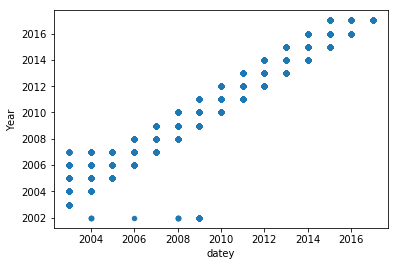

In [37]:
#Here we prove that the reports of reimboursement can be two years delayed 

mental.plot(x='datey', y='Year', kind = 'scatter')

plt.show()

In [38]:
mentala = mental.groupby('datey').mean().reset_index()

In [39]:
#pharma.type_drug_code.unique()
#mentala.drug_name_aggregated.unique()

mentala.head()

,datey,account_yy_ss,reimbt_cat_id,realization_date,quantity,amount_reimb,amount_not_reimb,Year,trim_pharma,produit_pharma,DDD,nombre_prises,orphan_flag,chapter_IV_bis_flag,link_same_tablet
0,2003,20039.688466,751011.966879,20032.454578,348.012734,125.829194,28.454979,2003.318868,20183.0,710049.464289,12.611884,10.601184,0.000000,0.000464,-5139.065314
1,2004,20049.619524,751009.473178,20042.459840,339.088489,144.217009,25.718768,2004.311381,20183.0,724469.363961,12.211785,10.242483,0.000000,0.000434,-5080.945557
2,2005,20059.572944,751133.805913,20052.457580,335.629823,162.616447,26.501690,2005.306900,20183.0,735918.032551,12.728864,10.550690,0.000007,0.000477,-4953.008747
3,2006,20069.511371,751266.592153,20062.434781,329.663308,174.496418,26.922850,2006.301494,20183.0,747344.640608,12.567800,10.467340,0.000027,0.000502,-4954.865668
4,2007,20079.668623,751415.573201,20072.461628,327.599329,177.462588,26.758492,2007.319139,20183.0,768762.231891,12.411583,10.136222,0.000055,0.000440,-4908.452871


In [40]:
code = mental.groupby(['datey','code_atc_1']).sum()

code.head()

account_yy_ss  reimbt_cat_id  realization_date  quantity  \
datey code_atc_1                                                             
2003  A               410951540    15401251684         410805326   9458979   
      B               110680105     4147060401         110639339    776768   
      C               336344100    12613148617         336224663   3238620   
      D               166227291     6228226888         166169282   1278089   
      G               118372492     4436332264         118331732    741889   

                  amount_reimb  amount_not_reimb      Year  trim_pharma  \
datey code_atc_1                                                          
2003  A              738085.30         913693.63  41081822    413892781   
      B              400354.22          83131.96  11064417    111470709   
      C              692515.49         207801.72  33623496    338751472   
      D              116429.82         107993.46  16617335    167417985   
      G               65241.37         172315.26  11833406    119220981   

                  produit_pharma           DDD  nombre_prises  orphan_flag  \
datey code_atc_1                                                             
2003  A              13807434263  365196.67489         320695            0   
      B               4110940108  165028.74508          87516            0   
      C              11891821211   70761.55525         100361            0   
      D               5400564172  145022.51878           3792            0   
      G               4847277113  191013.29324         106508            0   

                  chapter_IV_bis_flag  link_same_tablet  
datey code_atc_1                                         
2003  A                             2        -157026601  
      B                             0         -49272471  
      C                             0          -4891619  
      D                             0        -142839227  
      G                             0         -15185125

In [41]:
coda = code.reset_index()

In [42]:
coda.head()

,datey,code_atc_1,account_yy_ss,reimbt_cat_id,realization_date,quantity,amount_reimb,amount_not_reimb,Year,trim_pharma,produit_pharma,DDD,nombre_prises,orphan_flag,chapter_IV_bis_flag,link_same_tablet
0,2003,A,410951540,15401251684,410805326,9458979,738085.30,913693.63,41081822,413892781,13807434263,365196.67489,320695,0,2,-157026601
1,2003,B,110680105,4147060401,110639339,776768,400354.22,83131.96,11064417,111470709,4110940108,165028.74508,87516,0,0,-49272471
2,2003,C,336344100,12613148617,336224663,3238620,692515.49,207801.72,33623496,338751472,11891821211,70761.55525,100361,0,0,-4891619
3,2003,D,166227291,6228226888,166169282,1278089,116429.82,107993.46,16617335,167417985,5400564172,145022.51878,3792,0,0,-142839227
4,2003,G,118372492,4436332264,118331732,741889,65241.37,172315.26,11833406,119220981,4847277113,191013.29324,106508,0,0,-15185125


# First visualization 

### Time series of the amount reimboursed, according to the type of drug.

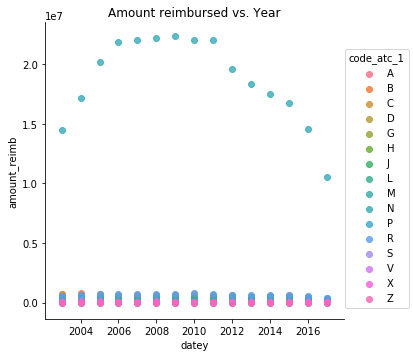

In [44]:
sns.lmplot(data=coda,
           x="datey",
           y="amount_reimb",
           hue="code_atc_1", fit_reg=False)

ax = plt.gca()
ax.set_title("Amount reimbursed vs. Year")

plt.show()

Drug code N represents "Nervous system", as it can be seen here: https://www.whocc.no/atc_ddd_index/?code=N&showdescription=yes
These drugs are: anesthetics (used for anesthesia), analgesics, antiepileptics and others.


## Case: Explain the particular behavior of nervous system drugs 

Why is the amount reimbursed so high in comparison to the rest of drugs? Analgesics are popular drugs. As it is shown in the code below, the quantity of drugs N is the higher from all the rest, with a total of 391,207,437. 

However, this does not explain the shape of the distribution during time. 

It was thought that there could be a link with patents, in particular with the transition moment when patents expire. 

In [63]:
coda.groupby('code_atc_1')['quantity'].sum() 

code_atc_1
A    115710154
B     13806262
C     51671761
D     16850829
G      9190178
H      6057944
J      5647449
L       979656
M     12208287
N    391207437
P       311229
R     22934902
S       249703
V       513717
X      5382464
Z       122449
Name: quantity, dtype: int64

In [45]:
#Ndrug = coda[coda['code_atc_1'].isin(['R','N', 'M'])]

Ndrug = coda [coda['code_atc_1']=='N']

Ndrug.head()

,datey,code_atc_1,account_yy_ss,reimbt_cat_id,realization_date,quantity,amount_reimb,amount_not_reimb,Year,trim_pharma,produit_pharma,DDD,nombre_prises,orphan_flag,chapter_IV_bis_flag,link_same_tablet
9,2003,N,1035960451,38820433554,1035577123,29984547,14482676.54,2070784.35,103562444,1043360185,34615655609,630951.90033,828058,0,60,-69083743
25,2004,N,1071179986,40122109749,1070788015,29765369,17182964.31,1873330.41,107083236,1078296958,36449795832,634117.80033,814413,0,60,-78914105
41,2005,N,1095645457,41024214268,1095244586,30036300,20233951.79,1963616.74,109529002,1102375277,37833381952,656451.28954,827021,0,69,-75964210
57,2006,N,1102588242,41274015002,1102189460,29463794,21871997.54,1961980.44,110223111,1108813654,38573896886,675173.44166,843173,0,74,-75483732
73,2007,N,1093443592,40919851709,1093045177,29048288,22038934.62,1919339.55,109309072,1099065265,39268437142,640543.93691,797790,0,64,-71705414


### Visualizing the other drugs

In [46]:
otherdrug = coda[coda['code_atc_1'] != 'N']

otherdrug.head()

,datey,code_atc_1,account_yy_ss,reimbt_cat_id,realization_date,quantity,amount_reimb,amount_not_reimb,Year,trim_pharma,produit_pharma,DDD,nombre_prises,orphan_flag,chapter_IV_bis_flag,link_same_tablet
0,2003,A,410951540,15401251684,410805326,9458979,738085.30,913693.63,41081822,413892781,13807434263,365196.67489,320695,0,2,-157026601
1,2003,B,110680105,4147060401,110639339,776768,400354.22,83131.96,11064417,111470709,4110940108,165028.74508,87516,0,0,-49272471
2,2003,C,336344100,12613148617,336224663,3238620,692515.49,207801.72,33623496,338751472,11891821211,70761.55525,100361,0,0,-4891619
3,2003,D,166227291,6228226888,166169282,1278089,116429.82,107993.46,16617335,167417985,5400564172,145022.51878,3792,0,0,-142839227
4,2003,G,118372492,4436332264,118331732,741889,65241.37,172315.26,11833406,119220981,4847277113,191013.29324,106508,0,0,-15185125


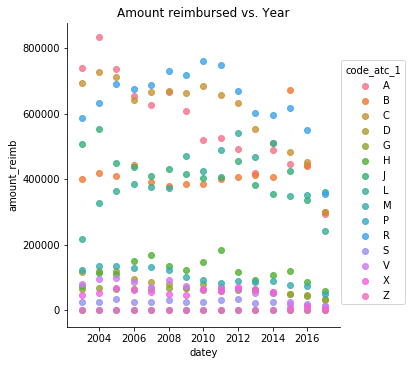

In [48]:
sns.lmplot(data=otherdrug,
           x="datey",
           y="amount_reimb",
           hue="code_atc_1", fit_reg=False)

ax = plt.gca()
ax.set_title("Amount reimbursed vs. Year")

plt.show()

### Comparing the amount reimbursed with the non reimbursed

The results for the Ndrug show that the amount reimbursed and not reimbursed falls after year 2012, therefore the general price is reduced. 

Text(0,0.5,'Amount reimboursed')

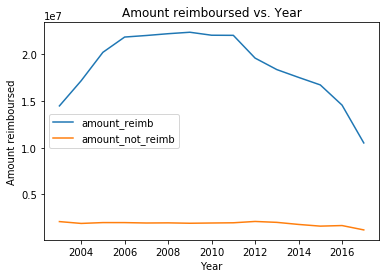

In [52]:
#It is grouped by the mean , we see a decay 

ax= Ndrug.plot(x='datey', y=['amount_reimb', 'amount_not_reimb'], kind='line',  
             title='Amount reimboursed vs. Year')

ax.set_xlabel("Year")
ax.set_ylabel("Amount reimboursed")

Text(0,0.5,'Amount not reimboursed')

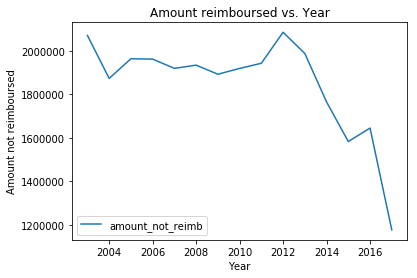

In [65]:
#The amount not reimboursed also has a decay behaviour in the last years

ax= Ndrug.plot(x='datey', y='amount_not_reimb', kind='line', 
             title='Amount reimboursed vs. Year')

ax.set_xlabel("Year")
ax.set_ylabel("Amount not reimboursed")

For the other drugs, prices flluctuate across the year. 

Text(0,0.5,'Amount reimboursed')

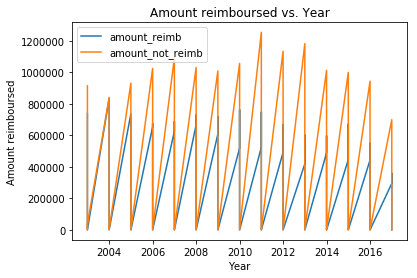

In [55]:
#It is grouped by the mean , we see a decay 

ax= otherdrug.plot(x='datey', y=['amount_reimb', 'amount_not_reimb'], 
             title='Amount reimboursed vs. Year')

ax.set_xlabel("Year")
ax.set_ylabel("Amount reimboursed")

### Other dataframes not used

In [ ]:
brugen= brux[brux['Type']== 'Psychiatrique'] #119.743 vs. 3.373.238

#brugen.info()

bru = brugen.copy()

brugen.drug_code.value_counts()

drugmax = bru[bru['drug_code']== 710087]

drugmax.info()

In [ ]:
bru= brugen.groupby('Year').sum()

bru.info()

In [ ]:
all = bru.merge(farma, on='drug_code', how='left')

In [ ]:
all.head()

In [ ]:
all.describe()

In [ ]:
all.columns

all.head()

In [ ]:
 #If I don't reset the index, year will be the index 

alla = all.groupby('Year').sum().reset_index()

In [ ]:
pharma.drug_code.unique()

In [ ]:
secret.describe()

In [ ]:
secret.info()

In [ ]:
secret.isnull().values.any()